In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('/content/archive.zip', compression='zip')

In [8]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
print("Summary statistics of the dataset:")
data.describe(include='all')

Summary statistics of the dataset:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [10]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())



Missing values in the dataset:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')


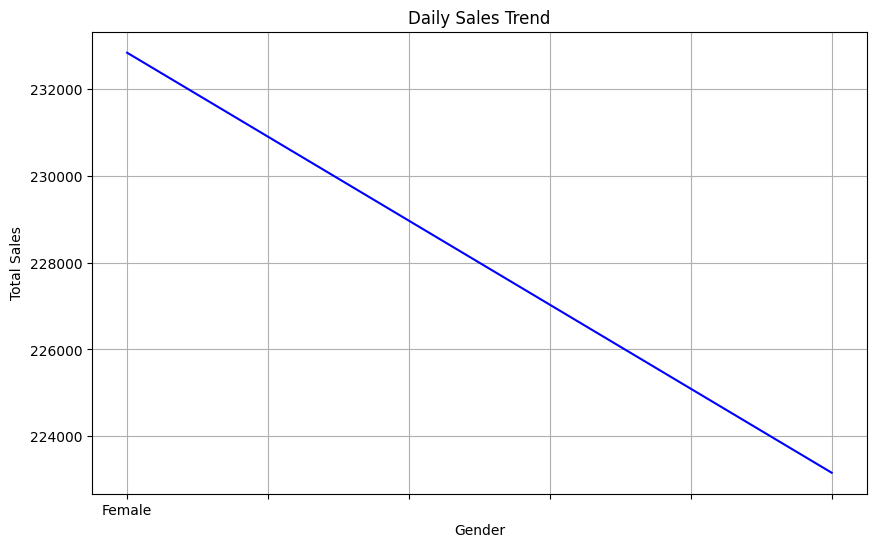

In [15]:
plt.figure(figsize=(10, 6))
daily_sales = data.groupby('Gender')['Total Amount'].sum()
daily_sales.plot(kind='line', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [16]:
plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Gender Distribution')

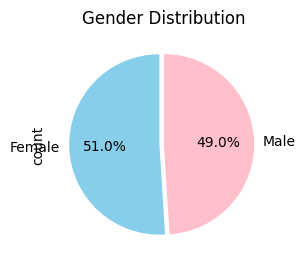

In [17]:
plt.subplot(1, 2, 1)
gender_counts = data['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'], explode=[0.05, 0])
plt.title('Gender Distribution')

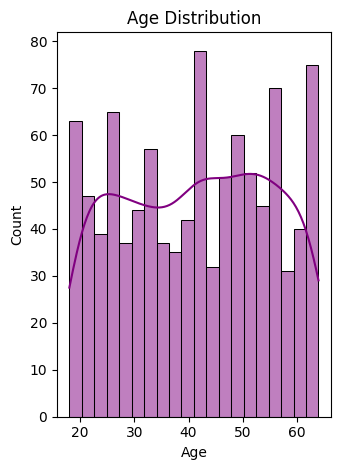

In [18]:
plt.subplot(1, 2, 2)
sns.histplot(data['Age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

<ipython-input-19-d7921129c621>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='coolwarm')


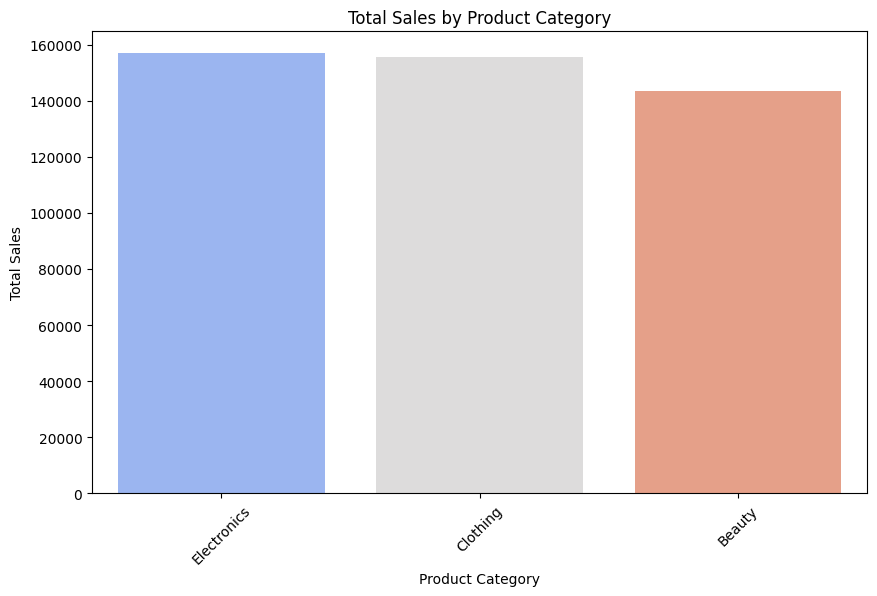

In [19]:
plt.figure(figsize=(10, 6))
product_sales = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
sns.barplot(x=product_sales.index, y=product_sales.values, palette='coolwarm')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-65804cb8f3e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Total Amount', data=data, palette='Set2')


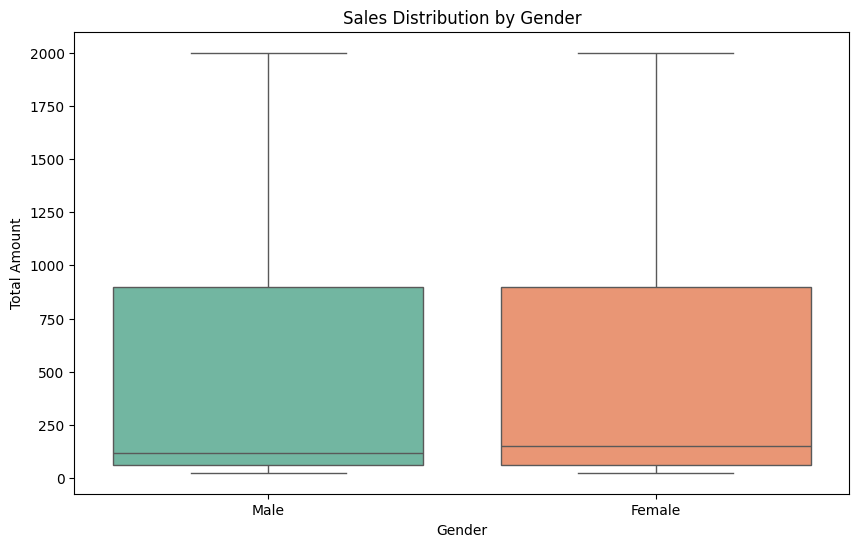

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Total Amount', data=data, palette='Set2')
plt.title('Sales Distribution by Gender')
plt.show()